<a href="https://colab.research.google.com/github/mokoron/EDA/blob/master/eda_omega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/max/2520/1*3rMzzcOz933RVvaO17UVLg.jpeg">

# some useful uploadings and imports

In [ ]:
%%capture
!wget  -O "Roboto.zip" "https://fonts.google.com/download?family=Roboto"

In [ ]:
%%capture
!unzip "Roboto.zip"

In [ ]:
%%capture
!mv Roboto-Light.ttf  /usr/share/fonts/truetype/

In [ ]:
%%capture
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/Roboto-Light.ttf'
fontprop = fm.FontProperties(fname=path, size= 12)
fontprop_title = fm.FontProperties(fname=path, size= 32)
fontprop_axis = fm.FontProperties(fname=path, size= 20)
#plt.plot(range(50), range(50), 'r')
#plt.title('test test te', fontproperties=fontprop)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import io
import plotly.express as px
from statistics import mean
%matplotlib inline

In [ ]:
from collections import Counter
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
colorscale = [[0, '#7BC100'],[.5, '#d8f5a9'],[1, '#ffffff']]
import spacy

# EDA for Omega chat logs dataset

let's start with some general information about the dataframe

In [ ]:
info = pd.DataFrame({"info": [], "value": []})

### Here are 10 first lines of the dataset

In [ ]:
data = pd.read_csv('en-US.csv', sep='\t', names=['dialog_index', 'speaker_index', 'support', 'datettime', 'message'])
sh_data = ff.create_table(data.head(10), colorscale=colorscale)
iplot(sh_data)

### Some information about the columns values and types

In [ ]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218158 entries, 0 to 218157
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   dialog_index   218158 non-null  int64 
 1   speaker_index  218158 non-null  int64 
 2   support        218158 non-null  int64 
 3   datettime      218158 non-null  object
 4   message        218152 non-null  object
dtypes: int64(3), object(2)
memory usage: 8.3+ MB


### Number of null values in the dataset

In [ ]:
data.isnull().sum()

dialog_index     0
speaker_index    0
support          0
datettime        0
message          6
dtype: int64

### Information about the total number of messages, dialogsm speakers etc.

In [ ]:
total = data.shape
info.loc[0] = 'Total number of messages (i.e. lines in the dataset)', total[0]
print(f'Total number of messages (i.e. lines in the dataset): {total[0]}')

Total number of messages (i.e. lines in the dataset): 218158


In [ ]:
dialogs_number = len(data['dialog_index'].unique())
info.loc[1] = 'Total number of dialogs', dialogs_number
print(f'Total number of dialogs: {dialogs_number}')

Total number of dialogs: 17345


In [ ]:
speakers_number = len(data['speaker_index'].unique())
info.loc[2] = 'Total number of speakers (including support)', speakers_number
print(f'Total number of speakers (including support): {speakers_number}')

Total number of speakers (including support): 14128


In [ ]:
support_number = data['support'].value_counts()
info.loc[3] = 'Total number of support messages', support_number[1]
print(f'Total number of support messages: {support_number[1]}')
info.loc[4] = 'Total number of customer messages', support_number[0]
print(f'Total number of customer messages: {support_number[0]}')

Total number of support messages: 108455
Total number of customer messages: 109703


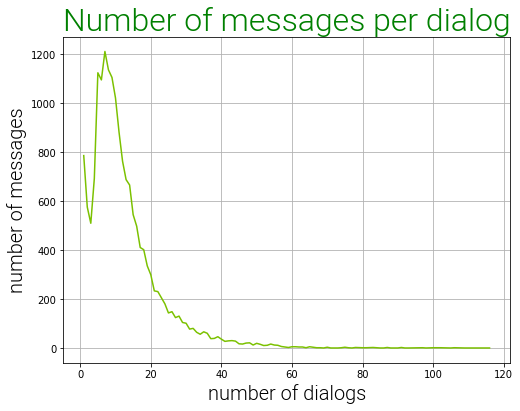

In [ ]:
message_number = data['dialog_index'].value_counts()
dial_stat = Counter(list(message_number))
plt.figure(figsize=(8,6))
plt.plot(*zip(*sorted(dial_stat.items())), color='#7BC100')
plt.grid(True)
plt.ylabel('number of messages',fontproperties=fontprop_axis)
plt.xlabel('number of dialogs',fontproperties=fontprop_axis)
plt.title('Number of messages per dialog', loc='left',fontproperties=fontprop_title, color="green")
plt.show()

### Here we have maximal, minimal and mean values of messages per dialog

In [ ]:
men = round(np.mean(message_number), 0)
mx = np.max(message_number)
mn = np.min(message_number)
info.loc[5] = 'Mean number of messages per dialog', men
print(f'Mean number of messages per dialog: {men}')
info.loc[6] = 'Max number of messages per dialog', mx
print(f'Max number of messages per dialog: {mx}')
info.loc[7] = 'Min number of messages per dialog', mn
print(f'Min number of messages per dialog: {mn}')

Mean number of messages per dialog: 13.0
Max number of messages per dialog: 116
Min number of messages per dialog: 1


## Here is an illustration of 3 dialogs of different length from the dataset:

In [ ]:
dial_mx = list(message_number[message_number == mx].index)[0]
dial_men = list(message_number[message_number == men].index)[0]
dial_mn = list(message_number[message_number == mn].index)[0]
ex_men = data[data['dialog_index'] == dial_men].sort_index(ascending=False)
ex_mx = data[data['dialog_index'] == dial_mx].sort_index(ascending=False)
ex_mn = data[data['dialog_index'] == dial_mn].sort_index(ascending=False)

In [ ]:
def print_dialog(ex_table):
  for mes, sup in zip(ex_table['message'], ex_table['support']):
    if sup == 0:
      print(f'customer: {mes}')
    else:
      print(f'support: {mes}')

### Example of a dialog of the mean length

In [ ]:
print_dialog(ex_men)

Example of a dialog of the mean length:

support: Hello, my name is Richard, how may I help you?
customer: I'm looking for a thermometer. I have a Omega 866C and looking for a similar.
customer: The cable we use is a Jack to a female mini jack where we plug in a RTD cable
support: Please hold while I investigate. Thank You.
customer: I have found your 868 and 869 series but the mating connection isn't the same as the 866C. But if there is a cable who can be attached these and have a female mini-jack in the end then it would be an solution.
support: http://www.omega.com/temperature/pdf/ON-403-PP.pdf
support: http://www.omega.co.uk/pptst/ON-403-PP.html
customer: Thank you. We have out own 'one time use' Sensor. Do you have a link to the device who supports that jack plug?
support: http://www.omega.co.uk/pptst/ON-400_PROBES.html
customer: Thank you!If I have a device (866C) which needs to be calibrated is it then something you do? And how much does such service cost?
support: How many cal

### Example of a dialog of the min length

In [ ]:
print_dialog(ex_mn)

Example of a dialog of the min length:

support: Hello, my name is Bob Schaale, how may I help you? 


### Example of a dialog of the max length:

In [ ]:
print_dialog(ex_mx)

Example of a dialog of the max length:

support: Hello, my name is Steve, how may I help you?
customer: Hi Steve.
customer: I've a project that involves using a lot of long thermocouples
customer: Long = about 70 to 80 ft thermocouples.
customer: When I tried comparing the accuracy of longer thermocouple with smaller length, there is always a difference in reading between two thermocouples
customer: although the tips are at same place
support: hello Sachin , what is the application ? max and min temp ?
customer: It is embedded in concrete pavement -- so it would be few degrees different than normal outside temperature
customer: -15 to 50 degree celsius
support: we can offer a T type ready made thermocouple that is 80 ft long , 
customer: We have Type N
customer: So my question is, i there a way to account for these drifts?
customer: Actually if you have an email id, it would be easier to show you the graphs.
support: are you welding&nbsp; the N type wire &nbsp; ?&nbsp; how much of a di

## Here is presented a summary of statistical information about the dataset

In [ ]:
sh_info = ff.create_table(info, colorscale=colorscale)
iplot(sh_info)

# Let's now look at some linguistic features of the messages

We will analyse syntactic, morphological and character features of 10% of our data

In [ ]:
print(f'10% of our dataset is equal to {int(total[0]/10)}')

10% of our dataset is equal to 21815


In [ ]:
%%capture
nlp = spacy.load("en_core_web_sm")
poses = []
dependencies = []
alpha = []
stopl = []
i = 0
for message in data['message']: 
  doc = nlp(str(message))
  poses += [token.pos_ for token in doc]
  dependencies += [token.dep_ for token in doc]
  alpha += [token.is_alpha for token in doc]
  stopl += [token.is_stop for token in doc]
  if i % 1000 == 0:
    print(i)
  if i == int(total[0]/10):
    break
  i += 1

In [ ]:
pos_dict = {
         'ADJ': 'adjective',
         'ADP': 'adposition',
         'ADV': 'adverb',
         'AUX': 'auxiliary',
         'CCONJ': 'co. conjunction',
         'DET': 'determiner',
         'INTJ': 'interjection',
         'NOUN':  'noun',
         'NUM': 'numeral',
         'PART': 'particle',
         'PRON': 'pronoun',
         'PROPN': 'proper noun',
         'PUNCT': 'punctuation',
         'SCONJ': 'sub. conjunction',
         'SPACE': 'space',
         'SYM': 'symbol',
         'VERB': 'verb',
         'X': 'other'
          }
alpha_dict = {
    True: 'alphabetical',
    False: 'not alphabetical'
              }
stopl_dict = {
    True: 'stopwords',
    False: 'other words'
}

In [ ]:
pposes = [pos_dict[pos] for pos in poses]
pstopl = [stopl_dict[ent] for ent in stopl]
palpha = [alpha_dict[ent] for ent in alpha]

In [ ]:
c_poses = Counter(pposes)
df_poses = pd.DataFrame({'pos': c_poses.keys(), 'num': c_poses.values()})
df_poses = df_poses.sort_values(by='num', ascending=False)
c_alpha = Counter(palpha)
df_alpha = pd.DataFrame({'alpha': c_alpha.keys(), 'num': c_alpha.values()})
df_alpha = df_alpha.sort_values(by='num', ascending=False)
c_stopl = Counter(pstopl)
df_stopl = pd.DataFrame({'stop': c_stopl.keys(), 'num': c_stopl.values()})
df_stopl = df_stopl.sort_values(by='num', ascending=False)
c_dependencies = Counter(dependencies)
df_dependencies = pd.DataFrame({'dep': c_dependencies.keys(), 'num': c_dependencies.values()})
df_dependencies = df_dependencies.sort_values(by='num', ascending=False)

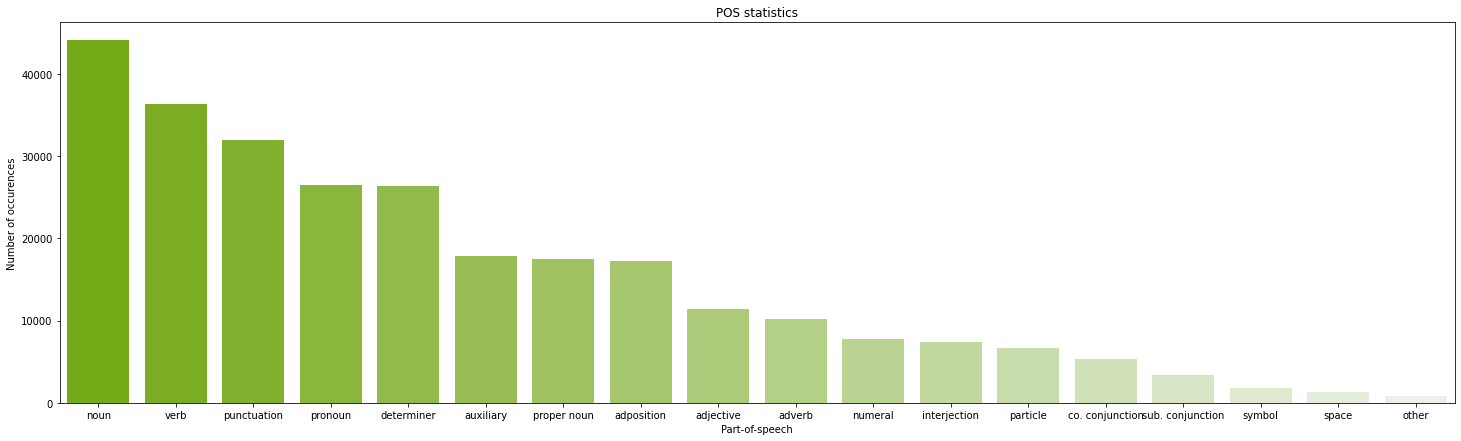

In [ ]:
f, ax = plt.subplots(figsize=(25, 7))
sns.barplot(x = 'pos', y='num', data=df_poses,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(set(poses))))
plt.xlabel('Part-of-speech')
plt.ylabel('Number of occurences')
plt.title('POS statistics')
plt.show()

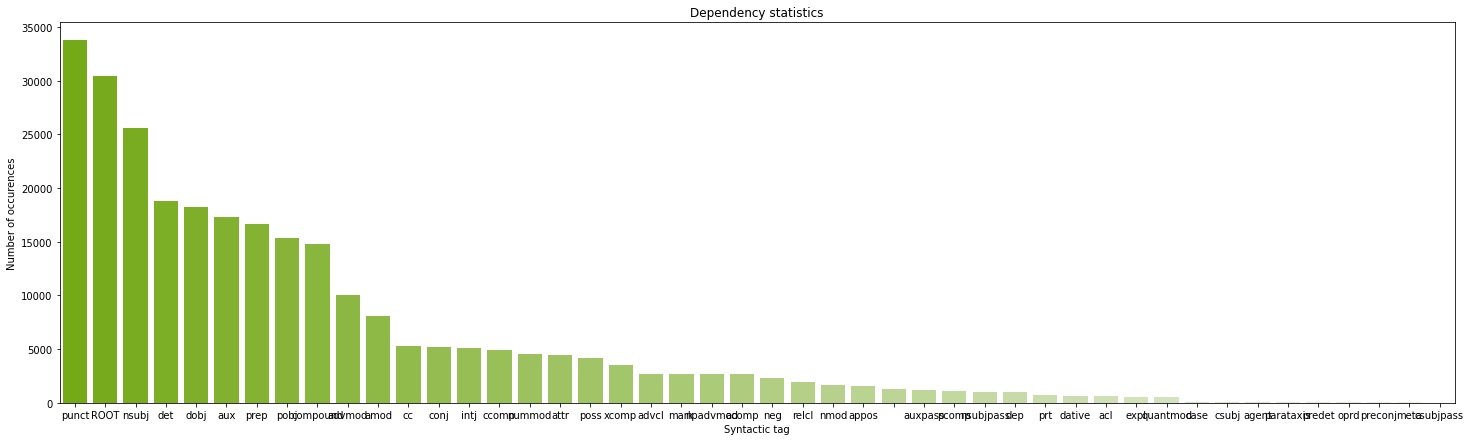

In [ ]:
f, ax = plt.subplots(figsize=(25, 7))
sns.barplot(x = 'dep', y='num', data=df_dependencies,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(set(dependencies))))
plt.xlabel('Syntactic tag')
plt.ylabel('Number of occurences')
plt.title('Dependency statistics')
plt.show()

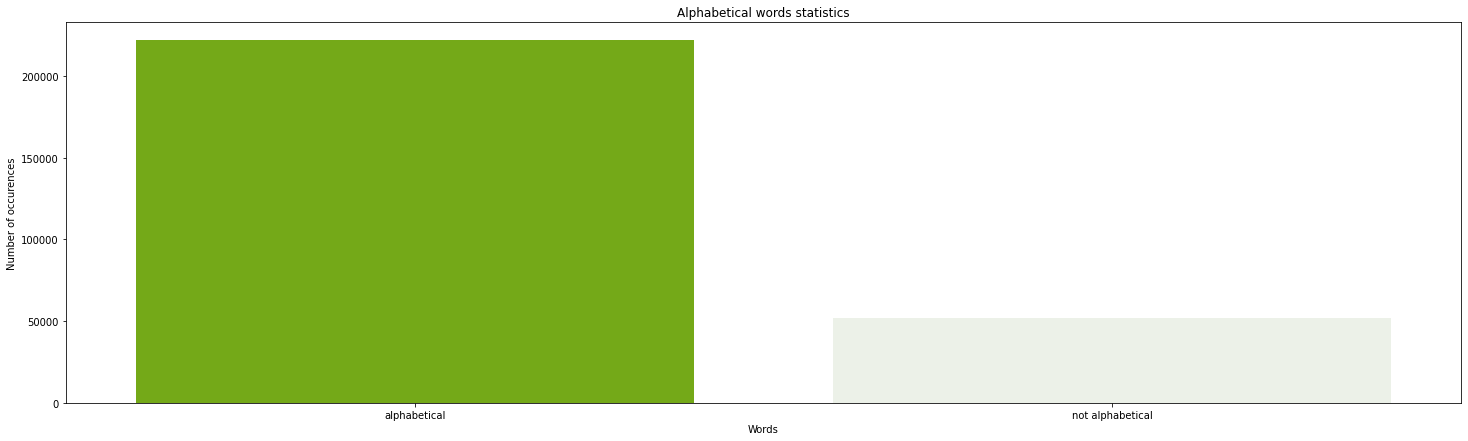

In [ ]:
f, ax = plt.subplots(figsize=(25, 7))
sns.barplot(x = 'alpha', y='num', data=df_alpha,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(set(alpha))))
plt.xlabel('Words')
plt.ylabel('Number of occurences')
plt.title('Alphabetical words statistics')
plt.show()

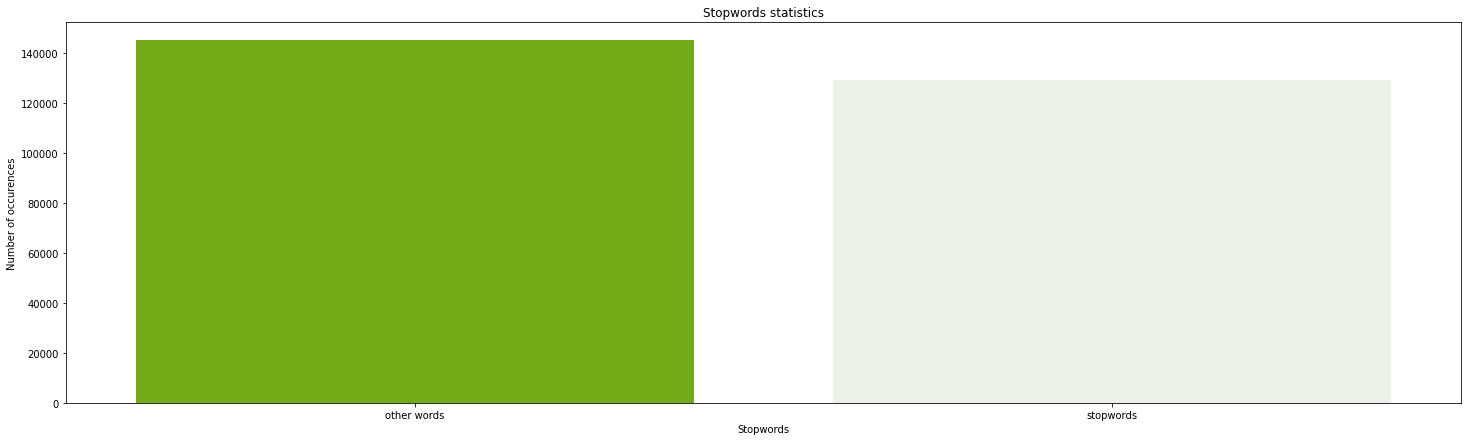

In [ ]:
f, ax = plt.subplots(figsize=(25, 7))
sns.barplot(x = 'stop', y='num', data=df_stopl,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(set(stopl))))
plt.xlabel('Stopwords')
plt.ylabel('Number of occurences')
plt.title('Stopwords statistics')
plt.show()